# Шаг 1. Получение первичной информации об исследуемом data frame

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
games_full_df=pd.read_csv('/datasets/games.csv')
print(games_full_df)

                                Name Platform  Year_of_Release         Genre  \
0                         Wii Sports      Wii           2006.0        Sports   
1                  Super Mario Bros.      NES           1985.0      Platform   
2                     Mario Kart Wii      Wii           2008.0        Racing   
3                  Wii Sports Resort      Wii           2009.0        Sports   
4           Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing   
...                              ...      ...              ...           ...   
16710  Samurai Warriors: Sanada Maru      PS3           2016.0        Action   
16711               LMA Manager 2007     X360           2006.0        Sports   
16712        Haitaka no Psychedelica      PSV           2016.0     Adventure   
16713               Spirits & Spells      GBA           2003.0      Platform   
16714            Winning Post 8 2016      PSV           2016.0    Simulation   

       NA_sales  EU_sales  JP_sales  Ot

In [2]:
print(games_full_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB
None


Есть большое количество пропусков в стоблцах Critic_Score(оценка критиков), User_Score(оценка игроков) и Rating(рейтинг)
Эти пропуски могут возникнуть - если это недавно вышедшие игры, не успела обновиться информация, еще не оценили критики и тд 
Пропуски в годе выхода могут возникнуть, если игра выпущена для тестирования
Также часть пропусков может быть случайной, потому что одна и та же игра может иметь разные названия на разных платформах

# Шаг 2. Проведение необходимой предобработки данных

Замена регистра в названиях столбцов

In [3]:
games_full_df.columns=map(str.lower, games_full_df.columns)

Заполнение пропусков, смена типов столбцов

In [4]:
print(games_full_df['rating'].value_counts())

E       3990
T       2961
M       1563
E10+    1420
EC         8
K-A        3
RP         3
AO         1
Name: rating, dtype: int64


В столбце Raiting есть пропущенные значения, согласно законодательству большинства стран у любой информационной продукции должен быть указан возрастной рейтинг. Если рейтинг не указан, то игра не может быть издана, следовательно игры у которых не указан возрастной ценз либо находятся на стадии тестирования, либо это будущие проекты, либо это проекты изданные в то время, когда данная процедура ( выставление возрастного рейтинга ) была необязательной. Также можно предположить, что значение не указано потому что компания-издатель игры не подавала заявку на присвоение определенного возрастного рейтинга своей информационной продукции.
На данный момент существует такая временная замена отсутствия рейтинга как RP» («Rating Pending») — «Рейтинг ожидается». Заменим все пропущенные значения в столбце Raiting на nan

В стобце с оценками пользователей встречается 'tbd', которое можно расшифровать как 'to be determined' - будет определено. 'tbd' может возникнуть для тех игр, которые вышли совсем недавно, либо для будущих игр серии, так как геймеры могут оформить предзаказ на игру, которая только будет выпущена(сейчас так поступают многие издатели компьютерных игр, к примеру компания Ubisoft с игрой Watch Dogs Legion)
Заменим 'tbd' на nan, пропуски во всех остальных столбцах не будем никак заполнять
Стоблецы с оценками критиков и игроков переведем в тип float, с датой выхода игры в тип int

In [5]:
games_full_df=games_full_df.replace('tbd',np.nan)

games_full_df['user_score']=games_full_df['user_score'].astype('float')
games_full_df['critic_score']=games_full_df['critic_score'].astype('float')

Добавим стоблец с суммарными продажами 

In [6]:
games_full_df['sum_sales']=games_full_df['na_sales']+games_full_df['eu_sales']+games_full_df['jp_sales']+games_full_df['other_sales']

In [7]:
games_full_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 12 columns):
name               16713 non-null object
platform           16715 non-null object
year_of_release    16446 non-null float64
genre              16713 non-null object
na_sales           16715 non-null float64
eu_sales           16715 non-null float64
jp_sales           16715 non-null float64
other_sales        16715 non-null float64
critic_score       8137 non-null float64
user_score         7590 non-null float64
rating             9949 non-null object
sum_sales          16715 non-null float64
dtypes: float64(8), object(4)
memory usage: 1.5+ MB


Вывод: была преведена замена типов для столбцов с пользовательскими и критикскими оценками, заполнены пропуски на -1, так как данная замена бросается в глаза по нескольким причинам: оценка не может быть отрицательной, названия игр крайне редко начинаются с -1, а рейтинг подразумевает под собой буквенное обозначение, а не циферное

# Шаг 3. Исследовательский анализ данных


In [8]:
def seaborn_distplot(data,column, count_bins,txt):
    sns.set_style('whitegrid')
    plt.figure(figsize=(15,12))
    display(sns.distplot(data[column],kde=False, bins=count_bins-1).set_title(txt))

# Сколько игр выпускалось в разные годы

/opt/conda/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/opt/conda/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


Text(0.5, 1.0, 'Количество выпущенных игр в год')

<Figure size 1080x864 with 0 Axes>

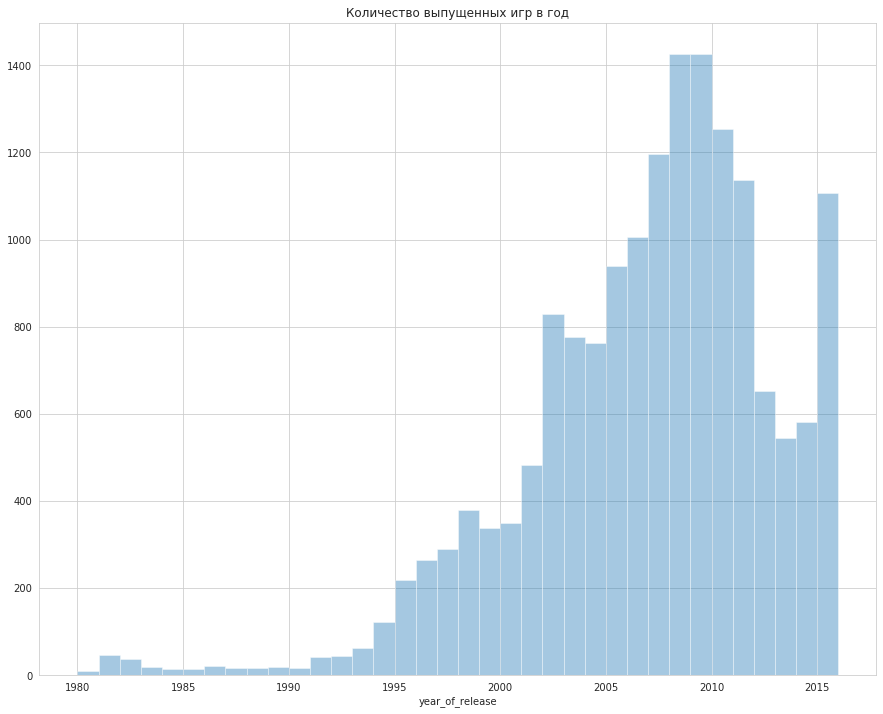

In [9]:
plt.figure(figsize=(15,12))
seaborn_distplot(games_full_df[games_full_df['year_of_release']!=-1],'year_of_release', 
                 len(games_full_df['year_of_release'].value_counts()),"Количество выпущенных игр в год")

Количество игр, выпускаемых в год росло до 2008 года, после пошел спад, возможно повлиял экономический кризис, выход новых игровых двигателей, увеличение требований игроков к качеству игры, да и сами игры стали более масштабными, требующими длительной и серьезной проработки. Из графика видно, что анализ можно строить на данных с 2014 года, так как после этого года наблюдается спад в количестве выпущенных игр

<div class="alert alert-success">
<h2> Комментарий наставника</h2>

Причина спада последних лет объяснена. 

</div>

# Изменение продаж по платформам

Изучим как изменялось количество проданных игр по платормам,выделим временной промежуток, на основании которого  выделим актуальный временной период, на основании которого будет производить дальнейшее исследование, также выберем топ-5самых популярных платформ

Text(0.5, 1, 'График продаж по годам для каждой платформы')

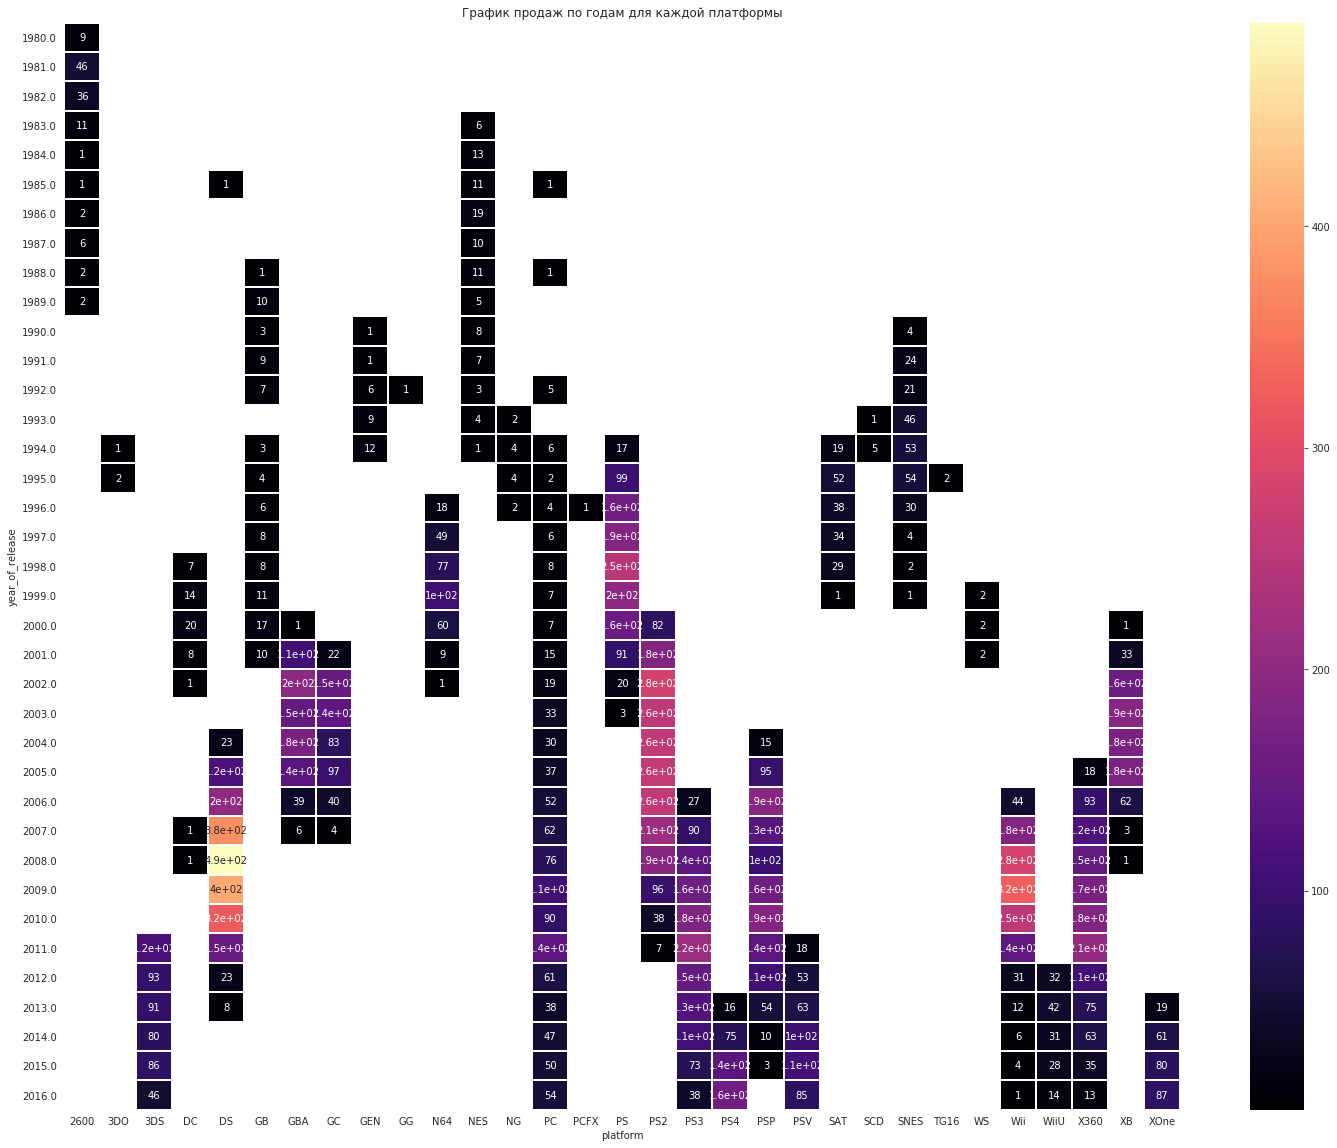

In [10]:
sales_by_platform=pd.pivot_table(games_full_df, index='year_of_release',values='sum_sales',
                                 aggfunc='count', columns='platform')

plt.figure(figsize=(25,20))
sns.heatmap(sales_by_platform,cmap='magma',annot=True,linecolor='white',linewidths=1).set_title("График продаж по годам для каждой платформы")

Исходя из графика можно сказать, что платформы уже выпущенные платформы обновляются раз в 6-8 лет, к примеру PS, Xbox

Выделим топ 5 самых популярных платформ, актуальный период взят равным 4 года, вполне достаточный промежуток для создания качественной игры, так как эксклюзивы - игры выпущенные только на определенной платформе нередко увеличивают интерес к платформе

In [11]:
top5_platforms=list(games_full_df[games_full_df.year_of_release>2015].platform.value_counts().sort_values(ascending=False).head(5).index.values)
print('Потенциально прибильные платформы',top5_platforms)
#сразу удалим неактуальные данные, которые не помогут нам построить предположение на счет продаж в 2017 году
games_full_df=games_full_df.query('year_of_release > 2013')
games_full_df_1=games_full_df

Потенциально прибильные платформы ['PS4', 'XOne', 'PSV', 'PC', '3DS']


И так, я выяснил, что среднее время жизни платформы 6-8 лет, актуальный временной промежуток для анализа выбран равным 1 год, объясню почему: мы видим, что приходит новое поколение консолей основных гигантов данной индустрии Sony и Microsoft, поэтому следует ожидать выход новых игр именно на эти консоли: это более прибыльно, так как новые консоли мощнее, следовательно они могут "переварить" более требовательные игры, как следствие более проработанные и объемные. С другой стороны, чем лучше(проработанней, объемней по контенту) игра, тем она более популярная, значит  потенциально более прибыльная

# Посмотрим boxplot-ы по продажам игр с разбивкой по платформам

Предварительно удалим все строки заглушками, так как они могут оказать влияние на конечный результат

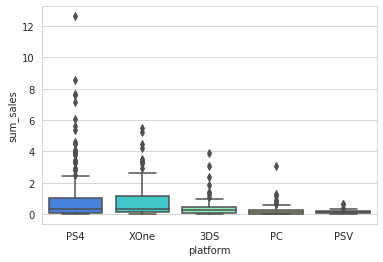

In [12]:
games_full_df=games_full_df.query('platform in @top5_platforms')
games_full_df=games_full_df.dropna()
display(sns.boxplot(x="platform", y="sum_sales", data=games_full_df, palette='rainbow'))

Видим, что прибыльность таких популярных платформ как PS4 и XOne примерно одинаковая, но для PS4 больше популярных игр,из-за чего есть выбивающиеся значения, остальные платформы из топ 5 заметно отстают
Разница между платформами может быть обусловлена несколькими факторами:

1.Основной рынок сбыта 
Для продуктов Sony, то есть PS разных поколений основным рынком является Япония и Евразия. Японский рынок весьма отличается от остальных, в силу менталитетных особенностей: любовь к манге, аниме, излишней мультяшности в сочетании с выскоми уровенм информационного развития и такого же высокого уровня жизни
2. Время существования платформы на рынке к моменту анализа данных
На новые платформы попросту не успели выйти достойные игры
3 года, конечно, достаточный срок для разработки игры, но современные реалии показывают, что разработка может длиться дольше(и в большинстве случаев именно так и происходит)

# Распределение игр по жанрам, самые прибыльные жанры

Text(0.5, 1, 'График прибыли с продаж игр  для каждого жанра за 2016 год')

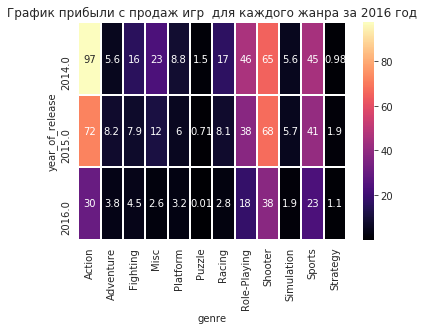

In [32]:
sales_by_platform_na=pd.pivot_table(games_full_df_1[games_full_df_1!=-1], index='year_of_release',values='sum_sales',
                                 aggfunc='sum', columns='genre')

sns.heatmap(sales_by_platform_na,cmap='magma',annot=True,linecolor='white',linewidths=1).set_title("График прибыли с продаж игр  для каждого жанра за 2016 год")

In [33]:
print(games_full_df.genre.value_counts().sort_values(ascending=False).head(5))

Action          187
Role-Playing     79
Shooter          77
Sports           71
Racing           36
Name: genre, dtype: int64


Самые прибыльная жанры за 2016 год: Action 63 млн$, Shooter 35 млн$, Sports 23 млн$, Role-Playing 19 млн $
Adventure 15 млн$

# Шаг 4. Портреты пользователей по регионам

Определим топ5 платформ, для этого пользователей каждого региона топ 5 платформ и изучим данные отдельно 

# Регион NA


Text(0.5, 1, 'График продаж по годам для каждой платформы')

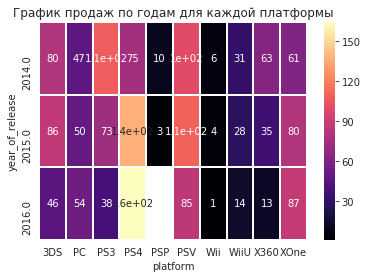

In [34]:
sales_by_platform_na=pd.pivot_table(games_full_df_1, index='year_of_release',values='na_sales',
                                 aggfunc='count', columns='platform')
sns.heatmap(sales_by_platform_na,cmap='magma',annot=True,linecolor='white',linewidths=1).set_title("График продаж по годам для каждой платформы")

Text(0.5, 1, 'График продаж по жанрам и по годам для каждой платформы')

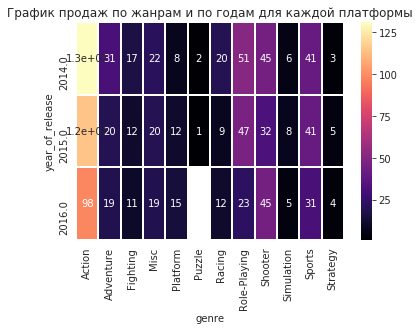

In [35]:
genre_na=pd.pivot_table(games_full_df_1[games_full_df_1.na_sales!=0], index='year_of_release',values='na_sales', aggfunc='count', columns='genre')
sns.heatmap(genre_na,cmap='magma',annot=True,linecolor='white',linewidths=1).set_title("График продаж по жанрам и по годам для каждой платформы")

Зависимость продаж и  рейтинга ESRB


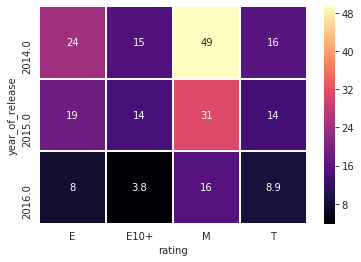

In [36]:
print('Зависимость продаж и  рейтинга ESRB')

rating_na=pd.pivot_table(games_full_df_1[games_full_df_1.na_sales!=0], index='year_of_release',values='na_sales', aggfunc='sum', columns='rating')
sns.heatmap(rating_na,cmap='magma',annot=True,linecolor='white',linewidths=1)

Топ 5 самых популярных платформ: PS4, XOne, PS5, PC, 3DS
Самые популярные жанры: Action, Shooter, Sports, Role_Playing, Misc
Пользователи данного континета предпочитают динамичные игры: шутеры или со спортиной составляющей, также не обходят стороной ролевые игры и Misc
Наибольшую прибиль в данном регионе приносят проекты с рейтингом M, наименьшую E10+

# Регион Jp


Text(0.5, 1, 'График продаж по годам для каждой платформы')

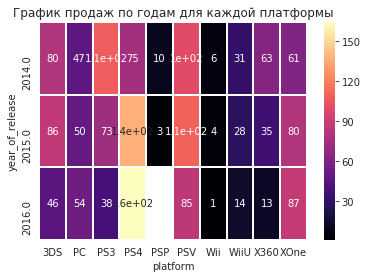

In [37]:
sales_by_platform_jp=pd.pivot_table(games_full_df_1, index='year_of_release',values='jp_sales',
                                 aggfunc='count', columns='platform')

sns.heatmap(sales_by_platform_jp,cmap='magma',annot=True,linecolor='white',linewidths=1).set_title("График продаж по годам для каждой платформы")

Text(0.5, 1, 'График продаж по жанрам и по годам для каждой платформы')

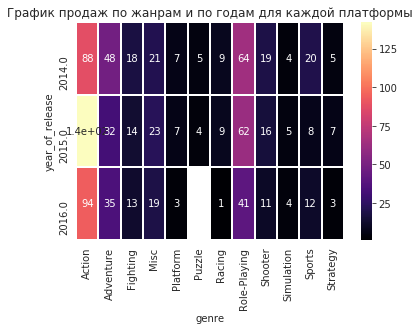

In [38]:
genre_jp=pd.pivot_table(games_full_df_1[games_full_df_1.jp_sales!=0], index='year_of_release',values='jp_sales', aggfunc='count', columns='genre')
sns.heatmap(genre_jp,cmap='magma',annot=True,linecolor='white',linewidths=1).set_title("График продаж по жанрам и по годам для каждой платформы")

Зависимость продаж и  рейтинга ESRB


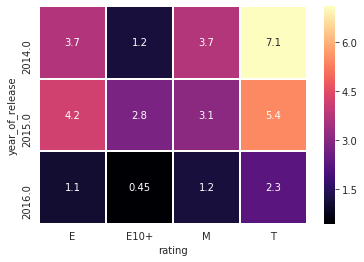

In [39]:
print('Зависимость продаж и  рейтинга ESRB')

rating_jp=pd.pivot_table(games_full_df_1[games_full_df_1.jp_sales!=0], index='year_of_release',values='jp_sales', aggfunc='sum', columns='rating')
sns.heatmap(rating_jp,cmap='magma',annot=True,linecolor='white',linewidths=1)

Топ 5 самых популярных платформ: PS4,XOne,PS5,PC,3DS
Топ 5 жанров: Action, Adventure, Role-Playing, Misc, Fighting
Пользователи данного региона предпочитают динамичные игры, приключения и ролевые игры,также Misc и Fighting
Среди игр с указанными рейтингом ESRB наибольшую прибыль приносят проекты с рейтингом T,меньше всего проекты с рейтингом E10+
Япония - высокотехнологичная страна, и как следствие внедрения различных информациооных технологий они стремятся использовать технологии во благо тинейджеров, уделяя им боьшое внимаени и в сфере игр

# Регион eu


Text(0.5, 1, 'График продаж по годам для каждой платформы')

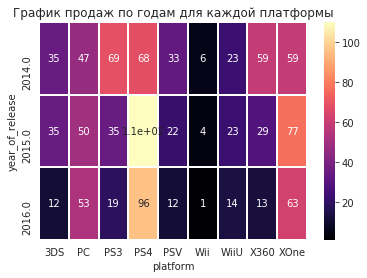

In [40]:
sales_by_platform_eu=pd.pivot_table(games_full_df_1[games_full_df_1.eu_sales!=0], index='year_of_release',values='eu_sales',
                                 aggfunc='count', columns='platform')

sns.heatmap(sales_by_platform_eu,cmap='magma',annot=True,linecolor='white',linewidths=1).set_title("График продаж по годам для каждой платформы")

Text(0.5, 1, 'График продаж по жанрам и по годам для каждой платформы')

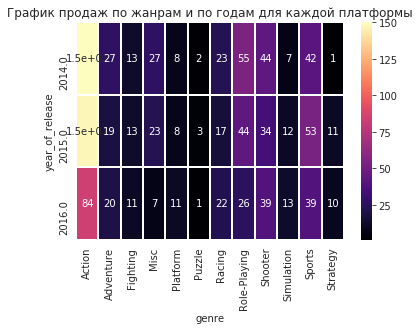

In [41]:
genre_eu=pd.pivot_table(games_full_df_1[games_full_df_1.eu_sales!=0], index='year_of_release',values='eu_sales', aggfunc='count', columns='genre')
sns.heatmap(genre_eu,cmap='magma',annot=True,linecolor='white',linewidths=1).set_title("График продаж по жанрам и по годам для каждой платформы")

Зависимость продаж и  рейтинга ESRB


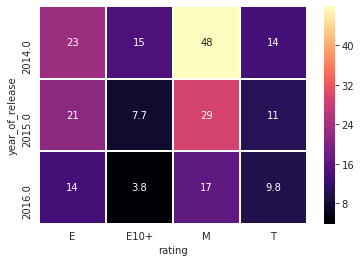

In [42]:
print('Зависимость продаж и  рейтинга ESRB')

rating_eu=pd.pivot_table(games_full_df_1[games_full_df_1.eu_sales!=0], index='year_of_release',values='eu_sales', aggfunc='sum', columns='rating')
sns.heatmap(rating_eu,cmap='magma',annot=True,linecolor='white',linewidths=1)

Топ 5 платформ: PS4, XOne, PC, PS3, WiiU
Топ 5 жанров: Action,Shooter,Sports, Role-Playing, Racing
Игроки предпочитают динамичные игры с перестрелками или спортивной составляющей, любят гонки и ролевые игры
Наибольшую прибыль приносят проекты с рейтингом M и T,наименьшую E10+

Можно сделать вывод, что вне зависимости от континента самыми популярными играми будут Action, Shooter, Spotrs и Role-Playing
Но их доли в рынке будут зависеть от континента 
Стабильно низкими продажами отличаются игры жарна Puzzle, Strategy - наверняка это нишевые игры
Самым прибыльным рейтингом можно считать M

# Шаг 5. Проверка гипотез

Первая гипотеза:средние пользовательские рейтинги платформ XOne и PС одинаковые

In [43]:
from scipy import stats as st
import numpy as np
def first_gip(platform1, platform2):
    sample_1=list(games_full_df[games_full_df['platform']==platform1].user_score)
    sample_2=list(games_full_df[games_full_df['platform']==platform2].user_score)
    alpha = .05
    results = st.ttest_ind(sample_1,sample_2)
    
    print('p-значение:', results.pvalue)
    print('Пороговое значение',alpha)
    if (results.pvalue < alpha):
        print("Отвергаем  гипотезу")
    else:
        print("Не получилось отвергнуть гипотезу")    

In [44]:
first_gip('XOne','PC')

p-значение: 0.13220921855005272
Пороговое значение 0.05
Не получилось отвергнуть гипотезу


p-value получилось большим, значит у нас нет оснований опровергнуть гипотезу о том, что средние пользовательские рейтинги платформ XOne и PC одинаковые

При увеличении актуального периода вывод о правильности гипотезы не изменился

Вторая гипотеза- средние пользовательский рейтинги жарнов "Action" и "Sports" равные

In [45]:
def sec_gip(genre_1, genre_2):
    sample_1=list(games_full_df[games_full_df['genre']==genre_1].user_score)
    sample_2=list(games_full_df[games_full_df['genre']==genre_2].user_score)
    alpha = .05
    results = st.ttest_ind(sample_1,sample_2)
    
    print('p-значение:', results.pvalue)
    print('Пороговое значение',alpha)
    if (results.pvalue < alpha):
        print("Отвергаем  гипотезу")
    else:
        print("Не получилось отвергнуть гипотезу")    

In [46]:
sec_gip('Action','Sports')

p-значение: 1.1027040779660591e-07
Пороговое значение 0.05
Отвергаем  гипотезу


Пороговое значение оказалось больше p-value, как следствие мы отвергаем гипотезу о равенстве средних пользовательских рейтингов жарнов Action и Sports

# Общий вывод

1. При обратоке данных были замечены пропуски, которые были обработаны.'tbd' заменено на nan
ТТакже, так как отсутствовал адекватный метод заполнений пропусков, пропуски не были заполнены( ведь отсутствие значения тоже значение)

2. Был проведен исследовательский анализ данных:

На графике количества выпущенных в год игр видны последствия экономического кризиса 2008 года: количество выпущенных игр в год стало уменьшаться, также известный факт- Sony и Microsoft дали возможность покупать помесячный и годовой доступы к играм, что является более выгодным, чем покупать игру, как следствие возможен спад дохода от продаж копий игр
С  другой стороны технологии шагнули так далеко, что теперь не у каждого пк,ноутбука или игровой платформы есть CD привод. Из-за этого геймеры вынуждены покупать игры в интернет магазинах, поэтому возможно компенсирование спада продаж игр из-за введения пропусков наплывом покупателей электронный копий, которые раньше покупали игры на физических носителях

Акуальный пероид для анализа данных был выбран с 2013 года, в это время одновременно выходили игры на новые и старые платформы(было бы интересно посмотреть на сколько быстро новые платформы вытесняют старые и есть ли корреляция между качеством игр и скоростью смерти платформы)
Топ 5 популярных платформ: PS4, PS5, XOne, PC, 3DS
При этом на японском рынке видно тотальное доминирование продукции Sony над Microsoft, на европейском рынке и на северо-американском рынке продукция Sony также доминирует, но не так сильно
Также на японском рынке самым прибыльным жанром является T, что говорит о нацеленности игровных студий на тинейджеров. Тогда как основная публика европы и северной америки приходится на категорию M
Самыми прибыльными игровыми жанрами являются Action, Shooter, Role-Playing, это говорит о том, что игровой аудитории по душе более активные и динамичные игры. Значит игровые студии будут делать упор на этих жанрах

3. Была опровергнута гипотеза о равентсве средних пользовательских оценок рейтинга Action и Sports,и была подтверждена гипотеза о равенстве средних пользовательских оценок платформ XOne 
Исходя из всего выше сказанного можно сделать такие выводы:
a)Cтоит ожидать выхода новых игр на новое поколение консолей -  PS5 и XOne
b)Самые прибыльные жанры врядли изменятся за остаток 2016 года, как следствие самые прибыльные продукты придутся на Action, Shooter, Role-Playing и Sports